In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\Kaggle Datasets\\Phone fraud\\phone_fraud.csv")
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### EDA

#### 1. Type

          total counts  Percentage
CASH_OUT       2237500    0.351663
PAYMENT        2151495    0.338146
CASH_IN        1399284    0.219923
TRANSFER        532909    0.083756
DEBIT            41432    0.006512


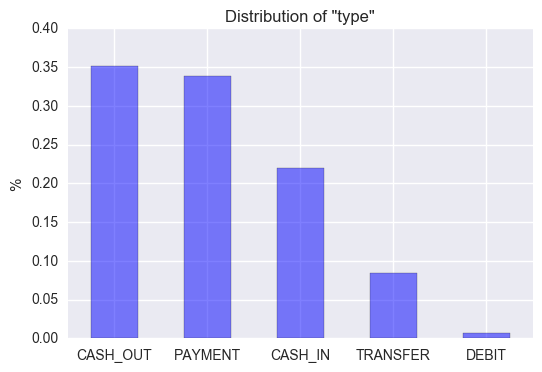

In [3]:
type_counts = pd.DataFrame()
type_counts['total counts'] = data['type'].value_counts()
type_counts['Percentage'] = type_counts['total counts']/type_counts['total counts'].sum()
print(type_counts)

type_counts['Percentage'].plot(kind='bar', rot=0, color='blue', alpha=0.5)
plt.ylabel('%')
plt.title('Distribution of "type"')

#### 2. Amount

Mean : 179861.90
Std  : 603858.23

Minm : 0.00
25%  : 13389.57
50%  : 74871.94
75%  : 208721.47750000004
Maxm : 92445516.64


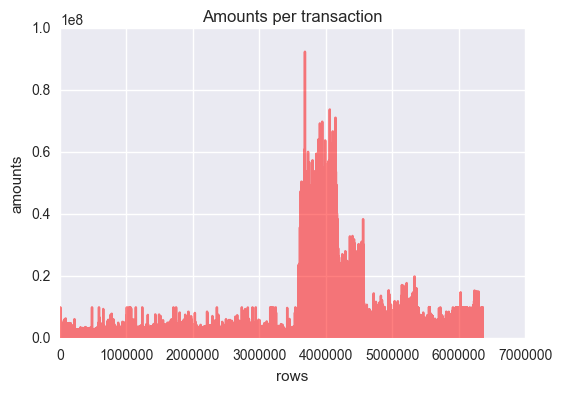

In [4]:
print("Mean : %.2f" %(data['amount'].mean()))
print("Std  : %.2f" %(data['amount'].std()))
print("")
print("Minm : %.2f" %(data['amount'].min()))
print("25%  : {}" .format(data['amount'].quantile(0.25)))
print("50%  : {}" .format(data['amount'].quantile(q=0.50)))
print("75%  : {}" .format(data['amount'].quantile(q=0.75)))
print("Maxm : %.2f" %(data['amount'].max()))


plt.plot(data['amount'], '-', color='r', alpha=0.5)
plt.xlabel("rows")
plt.ylabel("amounts")
plt.title("Amounts per transaction")

#### 3. origination and destination transactions

In [5]:
print("Number of unique customers: %d" %data['nameOrig'].nunique())

data['count'] = 1
cus_count = data[['count','nameOrig']].groupby('nameOrig').sum()
cus_count = cus_count[cus_count['count'] > 1]
print("Number of customers having more than 1 transaction: %d" %cus_count.shape[0])
print("")
print("Number of unique merchants: %d" %data['nameDest'].nunique())
marc_count = data[['count','nameDest']].groupby('nameDest').sum()
marc_count = marc_count[marc_count['count'] > 1]
print("Number of marchants having more than 1 transaction: %d" %marc_count.shape[0])

Number of unique customers: 6353307
Number of customers having more than 1 transaction: 9298

Number of unique merchants: 2722362
Number of marchants having more than 1 transaction: 459658


#### 4. IsFraud

   ActualFrauds  % ActualFrauds
0       6354407        0.998709
1          8213        0.001291


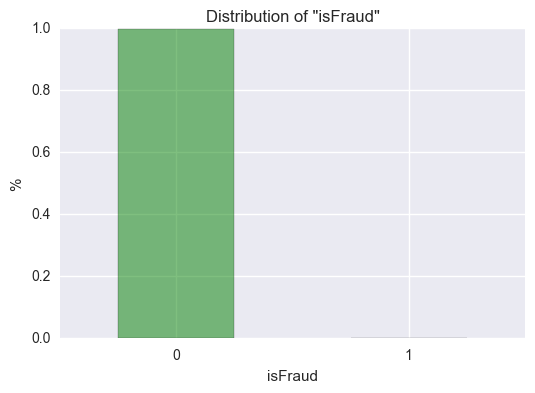

In [6]:

fraud_cnt = pd.DataFrame()
fraud_cnt['ActualFrauds'] = data['isFraud'].value_counts()
fraud_cnt['% ActualFrauds'] = fraud_cnt['ActualFrauds']/fraud_cnt['ActualFrauds'].sum()
print(fraud_cnt)

fraud_cnt['% ActualFrauds'].plot(kind='bar', rot=0, color='g', alpha=0.5)
plt.title('Distribution of "isFraud"')
plt.ylabel('%')
plt.xlabel('isFraud')

### Current Business model

In [7]:
# distribution of current business model
current_model = pd.DataFrame()
current_model['ActualFrauds'] = data['isFraud'].value_counts()
current_model['% ActualFrauds'] = current_model['ActualFrauds']/current_model['ActualFrauds'].sum()
current_model['FlaggedFrauds'] = data['isFlaggedFraud'].value_counts()
current_model['% FlaggedFrauds'] = current_model['FlaggedFrauds']/current_model['FlaggedFrauds'].sum()
print(current_model)

   ActualFrauds  % ActualFrauds  FlaggedFrauds  % FlaggedFrauds
0       6354407        0.998709        6362604         0.999997
1          8213        0.001291             16         0.000003


In [8]:
print(pd.crosstab(data.isFraud, data.isFlaggedFraud))

isFlaggedFraud        0   1
isFraud                    
0               6354407   0
1                  8197  16


In [9]:
# amount of transaction
fraud_amnt = data[data['isFraud'] == 1]
print("Actual Fraudulent transactions...")
print("Minimum: %.2f,  Maximum: %.2f,  Mean: %.2f" %(fraud_amnt['amount'].min(),fraud_amnt['amount'].max(),fraud_amnt['amount'].mean()))
print("")
flagfraud_amnt = data[data['isFlaggedFraud'] == 1]
print("Flagged Fraudulent transactions...")
print("Minimum: %.2f,  Maximum: %.2f,  Mean: %.2f" %(flagfraud_amnt['amount'].min(),flagfraud_amnt['amount'].max(),flagfraud_amnt['amount'].mean()))

Actual Fraudulent transactions...
Minimum: 0.00,  Maximum: 10000000.00,  Mean: 1467967.30

Flagged Fraudulent transactions...
Minimum: 353874.22,  Maximum: 10000000.00,  Mean: 4861597.73


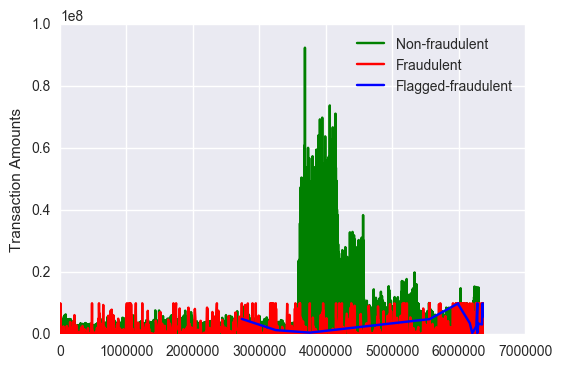

In [10]:
non_fraud = data[data['isFraud'] == 0]
flagfraud_amnt1 = data[data['isFlaggedFraud'] == 1]
plt.plot(non_fraud['amount'], '-', color='g', label='Non-fraudulent')
plt.plot(fraud_amnt['amount'], '-', color='r', label='Fraudulent')
plt.plot(flagfraud_amnt1['amount'], '-', color='b', label='Flagged-fraudulent')
plt.ylabel("Transaction Amounts")
plt.legend()

In [11]:
# type of transaction
type_counts = pd.DataFrame() 
type_counts['total counts'] = data['type'].value_counts()
type_counts['Actual frauds'] = data[['type','isFraud']].groupby('type').sum()
type_counts['Flagged frauds'] = data[['type','isFlaggedFraud']].groupby('type').sum()
type_counts['%-accuracy'] = type_counts['Flagged frauds'] / type_counts['Actual frauds']
print(type_counts)

          total counts  Actual frauds  Flagged frauds  %-accuracy
CASH_OUT       2237500           4116               0    0.000000
PAYMENT        2151495              0               0         NaN
CASH_IN        1399284              0               0         NaN
TRANSFER        532909           4097              16    0.003905
DEBIT            41432              0               0         NaN


### OTHER Insights

#### 1. Days

In [12]:
data['day'] = pd.cut(data['step'],[0,24,48,72,96,120,144,168,192,216,240,264,288,312,336,360,384,408,432,456,480,504,528,552,576,600,624,648,672,
                      696,720,800], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [13]:
data['count'] = 1
new_df = data.loc[(data.type == 'CASH_OUT') | (data.type == 'TRANSFER')]
time = new_df[['day','isFraud','amount','type','count']].groupby('day')
fraud_counts_perday = pd.DataFrame()
fraud_counts_perday['total'] = time['count'].sum()
fraud_counts_perday['frauds'] = time['isFraud'].sum()

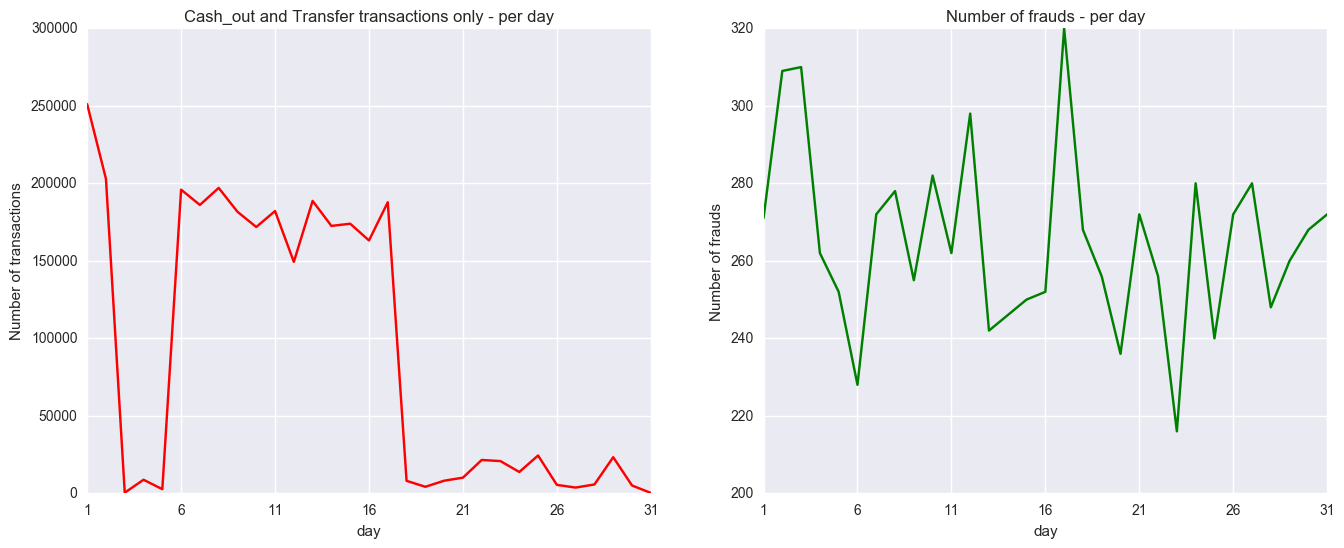

In [14]:
plt.figure(figsize=[16,6])
plt.subplot(121)
fraud_counts_perday['total'].plot(color='r')
plt.ylabel('Number of transactions')
plt.title("Cash_out and Transfer transactions only - per day")

plt.subplot(122)
fraud_counts_perday['frauds'].plot(color='g')
plt.ylabel('Number of frauds')
plt.title("Number of frauds - per day")

In [15]:
fraud_counts_perday['percentage'] = (fraud_counts_perday['frauds'] / fraud_counts_perday['total'])

In [16]:
print("Frauds per day..")
print("Mean: %.2f" %fraud_counts_perday['frauds'].mean())
print("Std : %.2f" %fraud_counts_perday['frauds'].std())


Frauds per day..
Mean: 264.94
Std : 23.46


Average % of frauds per day...
0.07425451968796597


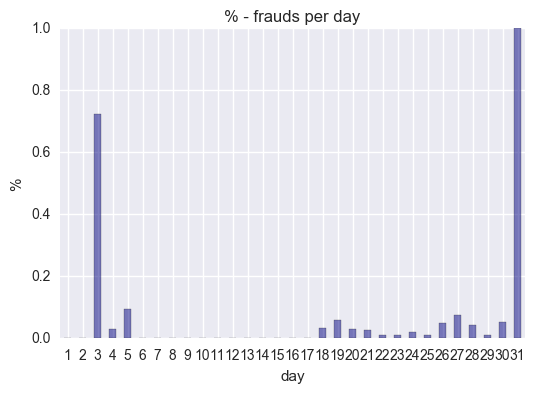

In [17]:
print("Average % of frauds per day...")
print(fraud_counts_perday['percentage'].mean())
fraud_counts_perday['percentage'].plot(kind='bar', color='navy', alpha=0.5, rot=0)
plt.title("% - frauds per day")
plt.ylabel("%")

#### 2. Irregularities in New balance:

In [18]:
data['newbal'] = data['oldbalanceOrg'] - data['amount']

In [19]:
data['origbal_diff'] = data['newbal'] != data['newbalanceOrig']

In [20]:
data['newbal_dest'] = data['oldbalanceDest'] + data['amount']
data['destbal_diff'] = data['newbal_dest'] != data['newbalanceDest']

In [21]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,count,day,newbal,origbal_diff,newbal_dest,destbal_diff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,160296.36,False,9839.64,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,19384.72,False,1864.28,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,1,0.00,False,181.00,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1,0.00,False,21363.00,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1,29885.86,False,11668.14,True


In [22]:
print("Customers..")
print(pd.crosstab(data['isFraud'], data['origbal_diff']))
print("")
print("Merchants..")
print(pd.crosstab(data['isFraud'], data['destbal_diff']))

Customers..
origbal_diff   False    True 
isFraud                      
0             940537  5413870
1               8086      127

Merchants..
destbal_diff    False    True 
isFraud                       
0             1623057  4731350
1                2889     5324


### Detect Frauds

In [24]:
X = data[['day','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','origbal_diff','destbal_diff']]
y = data.isFraud

In [25]:
from sklearn.preprocessing import LabelEncoder
list1 = ['type','origbal_diff','destbal_diff']
le = LabelEncoder()
for i in list1:
    X[i] = le.fit_transform(X[i])

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX = sc.fit_transform(X) 

In [28]:
# Model training and prediction
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split
def validation_cross(model, x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=0, test_size=0.3)
    model.fit(xtrain, ytrain)

    #Predict training set:
    pred = model.predict(xtest)

    #Perform cross-validation:
    cv_score = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy')
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model report:
    print ("\nModel Report on the TRAINING data...")
    print ("Accuracy_score: %.4g" %model.score(xtrain,ytrain))
    print ("CV Score : Mean - %.4g | Std - %.4g" % (np.mean(cv_score),np.std(cv_score)))
    print("")
    
    print ("\nModel Report on the TEST data...")
    print ("Accuracy: %.4g" %(accuracy_score(ytest,pred)))
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(ytest.values, pred)))
    print ("Classification Report...")
    print (classification_report(ytest,pred))
    cm = confusion_matrix(ytest,pred)
    
    plt.figure(figsize=[10,3])
    plt.subplot(121)
    print ("Confusion Matrix..")
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    print("")
    #auc plot
    plt.subplot(122)
    preds = rf.predict_proba(xtest)[:,1]
    fpr, tpr, _ = roc_curve(ytest, preds)
    area = auc(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='g', linewidth=2, label=('RandomForest: %.4g' %(auc(fpr,tpr))))
    plt.title("ROC curve")
    plt.legend(loc = 'lower right')
    plt.xlabel("False positives")
    plt.ylabel("True positives")

In [55]:
# plot Learning curves
from sklearn.learning_curve import learning_curve
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold

def plot_curve(model, train):
    model.fit(train, y)
    train_sizes, train_scores, test_scores = learning_curve(model, train, y, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1., 10), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.legend(loc="best")
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.ylim(.99,1.0)
    plt.show()


Model Report on the TRAINING data...
Accuracy_score: 1
CV Score : Mean - 1 | Std - 6.736e-07


Model Report on the TEST data...
Accuracy: 1
RMSE : 0.002289
Classification Report...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1906367
          1       1.00      1.00      1.00      2419

avg / total       1.00      1.00      1.00   1908786

Confusion Matrix..



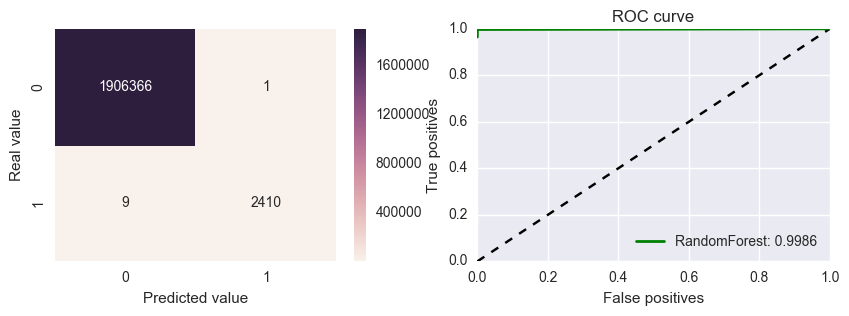

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
validation_cross(rf, XX, y)

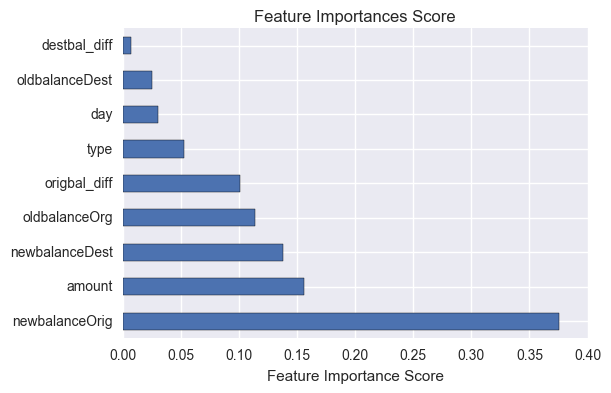

In [53]:
predictors1 = ['day','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','origbal_diff','destbal_diff']
feat_imp = pd.Series(rf.feature_importances_, predictors1).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances Score')
plt.xlabel('Feature Importance Score')
plt.savefig("feat_imp.png")

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


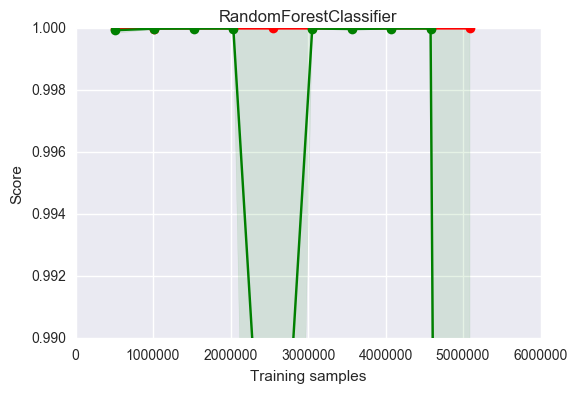

In [56]:
plot_curve(rf, XX)